# DATA SCIENCE & BUSINESS ANALYTICS INTERNSHIP JUNE-2022

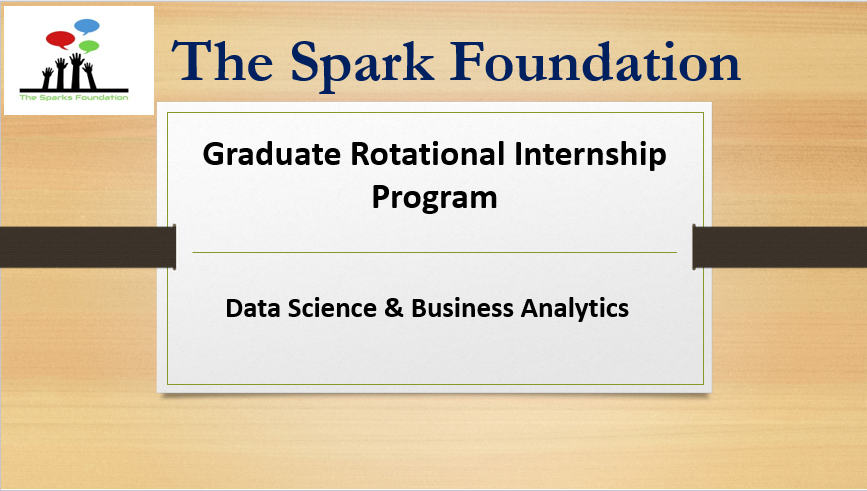

## GRIP @ The Sparks Foundation

## Author : Himanshu Sharma

### Task 6: Prediction using Decision Tree Algorithm.

### Problem Statement: From Iris dataset, Create the Decision Tree classifier and visualize it graphically.

- **The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.**

- **Dataset is available at:** https://bit.ly/3kXTdox

### 1.Importing Libraries

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### 2.Data Collection

In [2]:
# import the data set from local device
iris_df = pd.read_csv("Iris.csv")
print("Data imported successfully")
iris_df.head()   # to see the first 5 rows

Data imported successfully


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### 3.Dataset Understanding

In [3]:
iris_df.shape

(150, 6)

In [4]:
iris_df.size

900

In [5]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
iris_df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

### 4.EDA

In [7]:
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

- **There is no missing values in the dataset**

In [9]:
iris_df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [10]:
iris_df.drop("Id",axis=1, inplace=True)
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


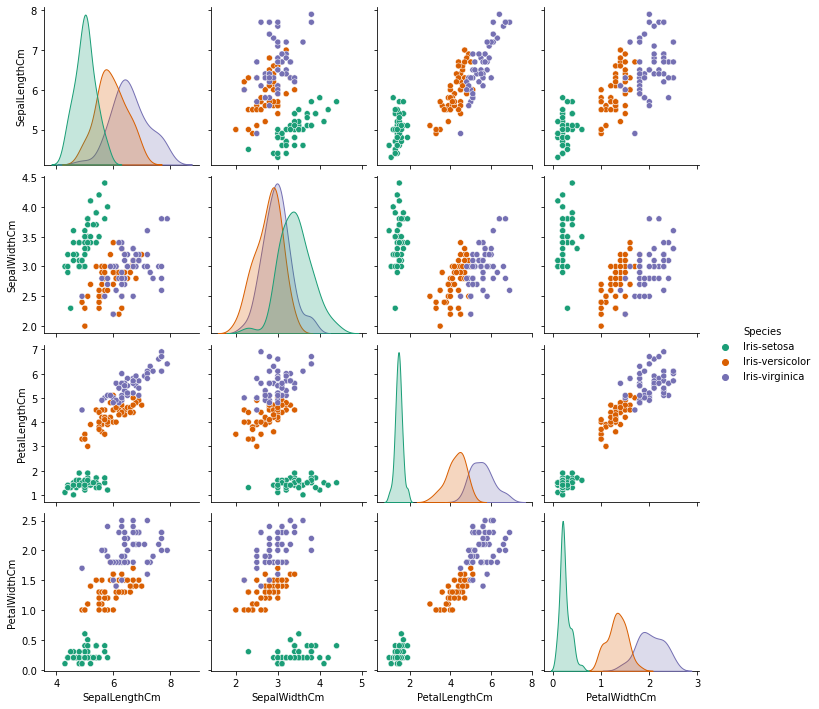

In [11]:
sns.pairplot(iris_df,hue='Species',palette='Dark2')
plt.show()

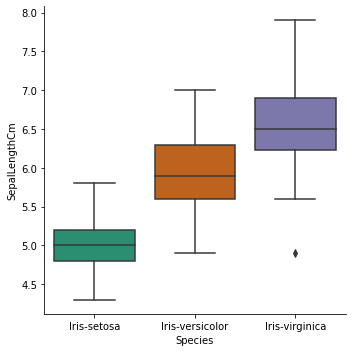

In [12]:
sns.catplot(x='Species',y='SepalLengthCm',data=iris_df,kind='box',palette='Dark2')
plt.show()

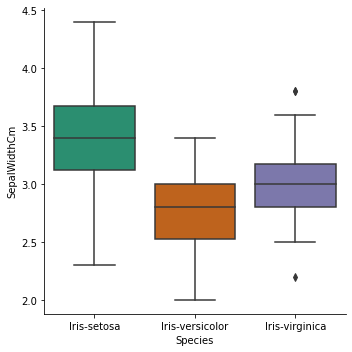

In [13]:
sns.catplot(x='Species',y='SepalWidthCm',data=iris_df,kind='box',palette='Dark2')
plt.show()

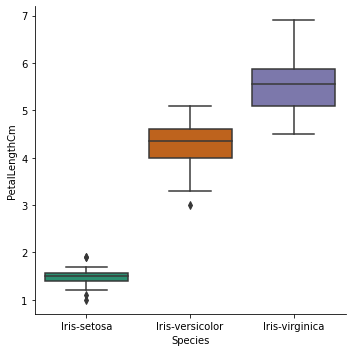

In [14]:
sns.catplot(x='Species',y='PetalLengthCm',data=iris_df,kind='box',palette='Dark2')
plt.show()

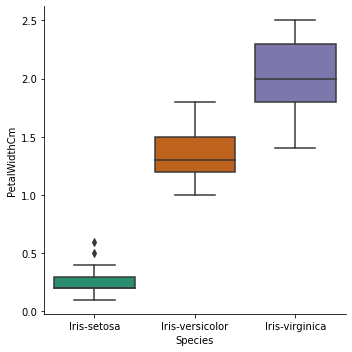

In [15]:
sns.catplot(x='Species',y='PetalWidthCm',data=iris_df,kind='box',palette='Dark2')
plt.show()

In [16]:
# To check the correlation between the variables.
iris_df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


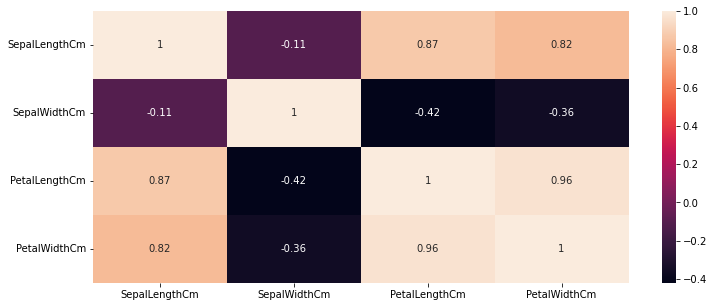

In [17]:
plt.figure(figsize=(12,5))
sns.heatmap(iris_df.corr(), annot=True) ## annot = True--> to print the values inside the square.
plt.show()

In [18]:
# Apply labels on dataset
iris_df["Species"] = iris_df["Species"].map({"Iris-setosa":0, "Iris-versicolor":1,"Iris-virginica":2})
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 5.Train & Test Split

In [19]:
x = iris_df.iloc[:,:-1] # last column values excluded.
y = iris_df.iloc[:,-1] # last column

In [20]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [21]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [23]:
x_train.shape

(105, 4)

In [24]:
x_test.shape

(45, 4)

## Modeling

### Decision Tree Classifier :- with default Hyperparameters

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.tree import plot_tree

In [26]:
#Build the model
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

print('Decision Tree Classifer Created')

Decision Tree Classifer Created


### Prediction

In [27]:
y_pred = model.predict(x_test)

In [28]:
pred_train = model.predict(x_train)

### Evaluation

In [29]:
accuracy_score(y_train,pred_train)

1.0

In [30]:
accuracy_score(y_test, y_pred)

0.9555555555555556

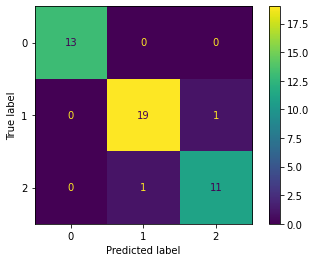

In [31]:
plot_confusion_matrix(model,x_test,y_test)
plt.show()

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.95      0.95      0.95        20
           2       0.92      0.92      0.92        12

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



- **Precision:** Accuracy of positive predictions.
- **Recall:** Fraction of positives that were correctly identified.
- **F1 score:** What percent of positive predictions were correct.
- **macro avg:** Averaging the unweighted mean per label.
- **Weighted avg:** Averaging the support-weighted mean per label.

## Visualize the Tree

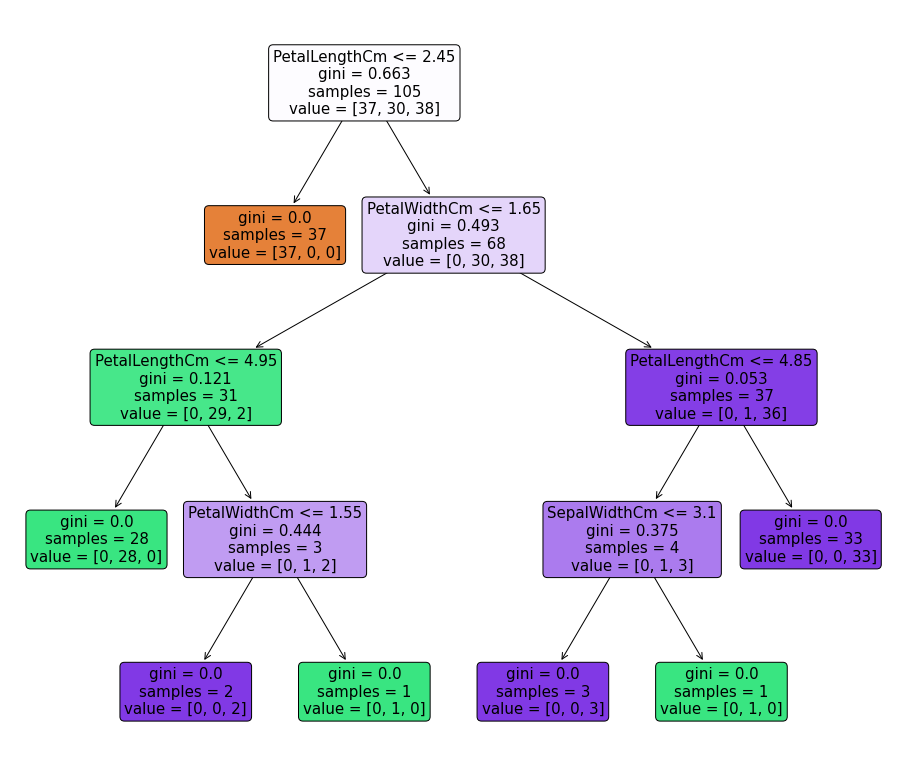

In [34]:
plt.figure(figsize=(16,14))
dtree = plot_tree(model,filled=True,feature_names=x.columns,rounded=True,fontsize=15)

### Now Prediction on new Data

In [35]:
new_data = pd.DataFrame({"SepalLengthCm": [3.2,2.4],"SepalWidthCm": [4.3,5.1],
                       "PetalLengthCm": [2.0,3.1], "PetalWidthCm": [0.9,0.7]})
new_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,3.2,4.3,2.0,0.9
1,2.4,5.1,3.1,0.7


In [37]:
new_predict = model.predict(new_data)

In [38]:
new_data["Predicted Species"] = new_predict
new_data    #Here 0: "Iris-setosa",1:"Iris-versicolor",2:'Iris-virginica'

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Predicted Species
0,3.2,4.3,2.0,0.9,0
1,2.4,5.1,3.1,0.7,1


### This is prediction Of new Data

- **Now we can test any data to this classifier and it would be able to predict the right class accordingly.**